May have to install via code block

```bash
!pip install numpy pandas scipy matplotlib
```


In [3]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'pandas'

### Run shell command `head` on filename

In [1]:
!head movies.csv

Release Date,Movie Title,Production Budget,Domestic Gross,Worldwide Gross
4/23/2019,Avengers: Endgame,400000000,858373000,2797800564
5/20/2011,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802
4/22/2015,Avengers: Age of Ultron,365000000,459005868,1395316979
12/16/2015,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2064615817
4/25/2018,Avengers: Infinity War,300000000,678815482,2044540523
5/24/2007,Pirates of the Caribbean: At World’s End,300000000,309420425,960996492
11/13/2017,Justice League,300000000,229024295,655945209
10/6/2015,Spectre,300000000,200074175,879500760
12/18/2019,Star Wars: The Rise of Skywalker,275000000,515202542,1072848487


### Read in a csv file and select the Date field

In [4]:
movies = pd.read_csv(
    'movies.csv',
    delimiter=',',
    parse_dates=['Release Date']
)

### Show dimensions of the `movies` DataFrame

In [5]:
movies.shape

(4000, 5)

In [6]:
movies.head()

,Release Date,Movie Title,Production Budget,Domestic Gross,Worldwide Gross
0,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802
2,2015-04-22,Avengers: Age of Ultron,365000000,459005868,1395316979
3,2015-12-16,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2064615817
4,2018-04-25,Avengers: Infinity War,300000000,678815482,2044540523


### List columns and thier data types

In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release Date       3979 non-null   datetime64[ns]
 1   Movie Title        4000 non-null   object        
 2   Production Budget  4000 non-null   int64         
 3   Domestic Gross     4000 non-null   int64         
 4   Worldwide Gross    4000 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 156.4+ KB


### Get statistical analysis on number value columns

In [8]:
movies.describe()

,Production Budget,Domestic Gross,Worldwide Gross
count,4.000000e+03,4.000000e+03,4.000000e+03
mean,4.693967e+07,5.896280e+07,1.333273e+08
std,4.520228e+07,7.898698e+07,2.101515e+08
min,9.500000e+06,0.000000e+00,0.000000e+00
25%,1.800000e+07,1.180895e+07,2.015602e+07
50%,3.000000e+07,3.435976e+07,5.944108e+07
75%,6.000000e+07,7.301702e+07,1.578348e+08
max,4.000000e+08,9.366622e+08,2.845900e+09


### Get statitics for specific numerical value column

In [63]:
movies['Domestic Gross'].describe()

count    4.000000e+03
mean     5.896280e+07
std      7.898698e+07
min      0.000000e+00
25%      1.180895e+07
50%      3.435976e+07
75%      7.301702e+07
max      9.366622e+08
Name: Domestic Gross, dtype: float64

### Box plot specific column

<AxesSubplot:>

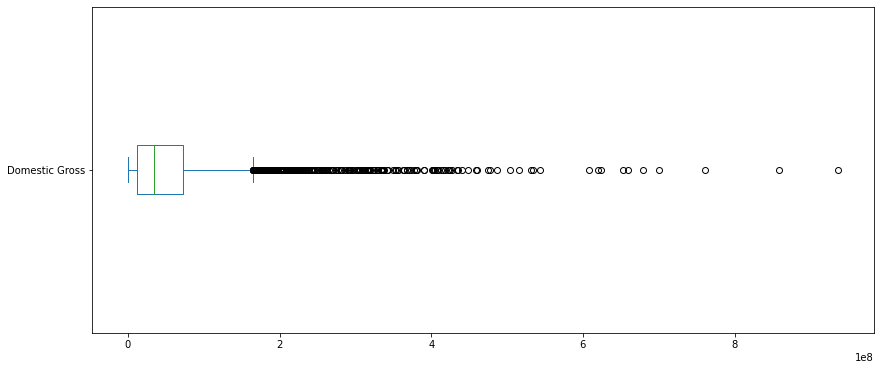

In [75]:
movies['Domestic Gross'].plot(kind='box', vert=False, figsize=(14,6))

<AxesSubplot:>

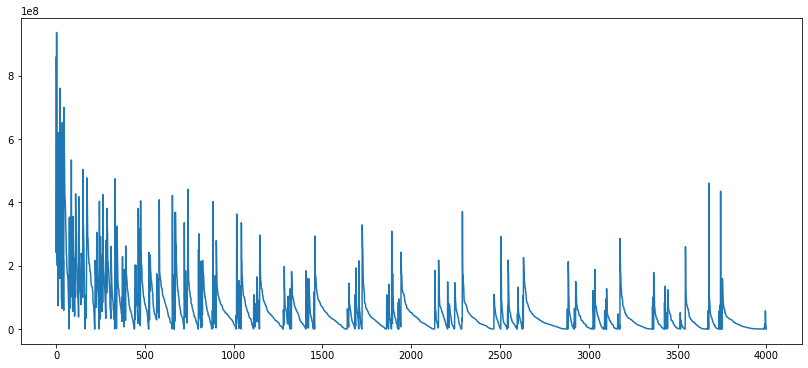

In [71]:
movies['Domestic Gross'].plot(figsize=(14,6))

### Add additional data to plot  
Use `axvline`

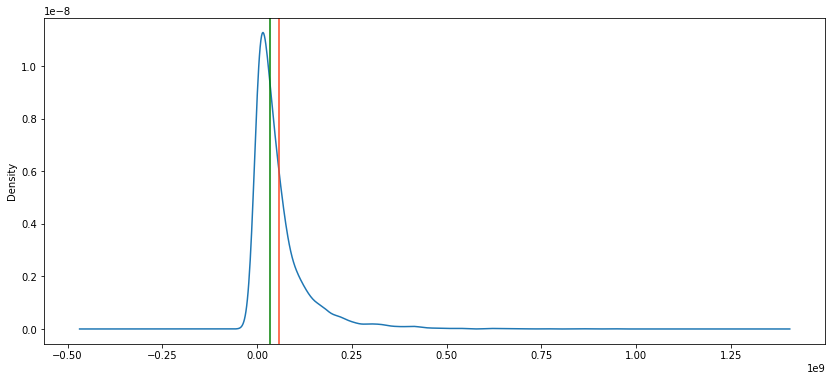

In [12]:
ax = movies['Domestic Gross'].plot(kind='density', figsize=(14,6))
ax.axvline(movies['Domestic Gross'].mean(), color="#ff4422")
ax.axvline(movies['Domestic Gross'].median(), color='green')

Text(0.5, 0, 'Length')

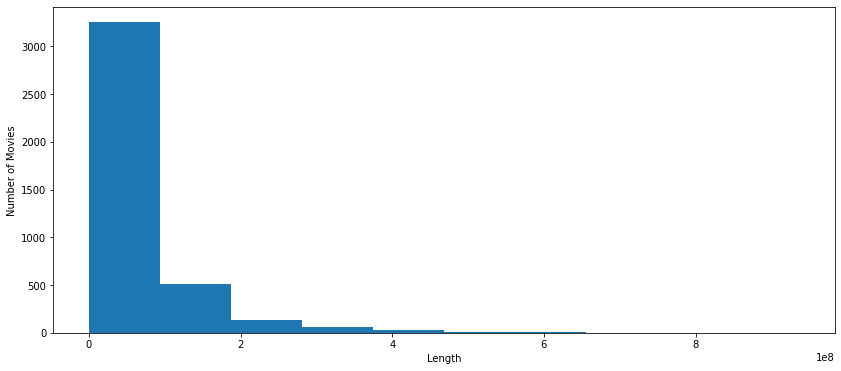

In [67]:
ax = movies['Domestic Gross'].plot(kind='hist', figsize=(14,6))
ax.set_ylabel('Number of Movies')
ax.set_xlabel('Length')

In [68]:
movies.head()

,Release Date,Movie Title,Production Budget,Domestic Gross,Worldwide Gross
0,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802
2,2015-04-22,Avengers: Age of Ultron,365000000,459005868,1395316979
3,2015-12-16,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2064615817
4,2018-04-25,Avengers: Infinity War,300000000,678815482,2044540523


### Get counts of each value for a column and sort

In [13]:
movies['Release Date'].value_counts().sort_values(ascending=False)

2000-12-22    8
2009-10-23    7
2004-12-17    7
2008-10-03    7
1996-12-20    6
             ..
1992-02-14    1
2016-07-29    1
2019-01-17    1
2012-12-12    1
2009-10-30    1
Name: Release Date, Length: 2267, dtype: int64

### Correlation of number value columns

In [69]:
corr = movies.corr()
corr

,Production Budget,Domestic Gross,Worldwide Gross
Production Budget,1.000000,0.642199,0.714920
Domestic Gross,0.642199,1.000000,0.934007
Worldwide Gross,0.714920,0.934007,1.000000


### Plot correlation in Red/Blue box format

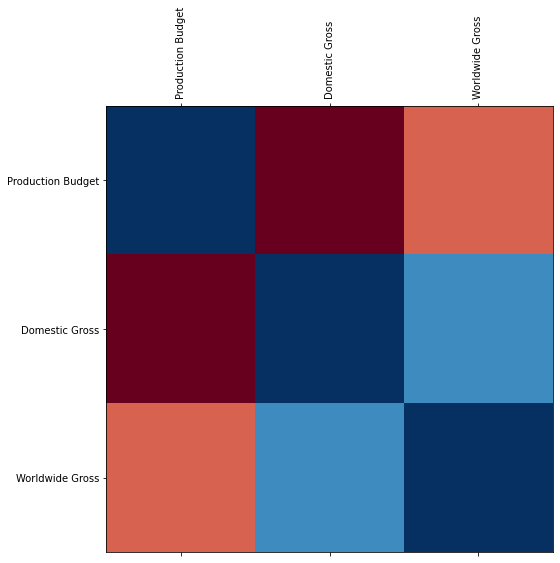

In [70]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

### Add column and round down the decimals

In [14]:
movies['Domestic Millions'] = (movies['Domestic Gross'] / 1000000).round(decimals=2)
movies.head()

,Release Date,Movie Title,Production Budget,Domestic Gross,Worldwide Gross,Domestic Millions
0,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564,858.37
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,241.07
2,2015-04-22,Avengers: Age of Ultron,365000000,459005868,1395316979,459.01
3,2015-12-16,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2064615817,936.66
4,2018-04-25,Avengers: Infinity War,300000000,678815482,2044540523,678.82


In [15]:
movies['Worldwide Millions'] = (movies['Worldwide Gross'] / 1000000).round(decimals=2)
movies.head()

,Release Date,Movie Title,Production Budget,Domestic Gross,Worldwide Gross,Domestic Millions,Worldwide Millions
0,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564,858.37,2797.80
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,241.07,1045.71
2,2015-04-22,Avengers: Age of Ultron,365000000,459005868,1395316979,459.01,1395.32
3,2015-12-16,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2064615817,936.66,2064.62
4,2018-04-25,Avengers: Infinity War,300000000,678815482,2044540523,678.82,2044.54


In [16]:
movies['Budget Millions'] = (movies['Production Budget'] / 1000000).round(decimals=2)
movies.head()


,Release Date,Movie Title,Production Budget,Domestic Gross,Worldwide Gross,Domestic Millions,Worldwide Millions,Budget Millions
0,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564,858.37,2797.80,400.0
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,241.07,1045.71,379.0
2,2015-04-22,Avengers: Age of Ultron,365000000,459005868,1395316979,459.01,1395.32,365.0
3,2015-12-16,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2064615817,936.66,2064.62,306.0
4,2018-04-25,Avengers: Infinity War,300000000,678815482,2044540523,678.82,2044.54,300.0


In [17]:
df = movies[['Release Date', 'Movie Title', 'Domestic Millions', 'Worldwide Millions', 'Budget Millions']]
df.head()

,Release Date,Movie Title,Domestic Millions,Worldwide Millions,Budget Millions
0,2019-04-23,Avengers: Endgame,858.37,2797.80,400.0
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,241.07,1045.71,379.0
2,2015-04-22,Avengers: Age of Ultron,459.01,1395.32,365.0
3,2015-12-16,Star Wars Ep. VII: The Force Awakens,936.66,2064.62,306.0
4,2018-04-25,Avengers: Infinity War,678.82,2044.54,300.0


### Find all the rows with no 'Release Date' and drop them - assign to new df

In [18]:
movies.info()
df = movies.dropna(subset=['Release Date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Release Date        3979 non-null   datetime64[ns]
 1   Movie Title         4000 non-null   object        
 2   Production Budget   4000 non-null   int64         
 3   Domestic Gross      4000 non-null   int64         
 4   Worldwide Gross     4000 non-null   int64         
 5   Domestic Millions   4000 non-null   float64       
 6   Worldwide Millions  4000 non-null   float64       
 7   Budget Millions     4000 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 250.1+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3979 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Release Date        3979 non

### Create a `df` with all values that have dates less than 2022  
### Use `.loc[mask]` to filter the values

In [19]:
mask = (df['Release Date'] < "2022-01-01")
df = df.loc[mask]
df.head()

,Release Date,Movie Title,Production Budget,Domestic Gross,Worldwide Gross,Domestic Millions,Worldwide Millions,Budget Millions
0,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564,858.37,2797.80,400.0
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,241.07,1045.71,379.0
2,2015-04-22,Avengers: Age of Ultron,365000000,459005868,1395316979,459.01,1395.32,365.0
3,2015-12-16,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2064615817,936.66,2064.62,306.0
4,2018-04-25,Avengers: Infinity War,300000000,678815482,2044540523,678.82,2044.54,300.0


#### Create new columns 'Year' and 'Month' using the 'Release Date' ('Release Date' must be a datetime)

In [20]:
df['Year'] = df['Release Date'].dt.year
df['Month'] = df['Release Date'].dt.month


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3948 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Release Date        3948 non-null   datetime64[ns]
 1   Movie Title         3948 non-null   object        
 2   Production Budget   3948 non-null   int64         
 3   Domestic Gross      3948 non-null   int64         
 4   Worldwide Gross     3948 non-null   int64         
 5   Domestic Millions   3948 non-null   float64       
 6   Worldwide Millions  3948 non-null   float64       
 7   Budget Millions     3948 non-null   float64       
 8   Year                3948 non-null   int64         
 9   Month               3948 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(1)
memory usage: 339.3+ KB


### Plot budget and domestic box office dollars grouped by 'Year'

<AxesSubplot:xlabel='Year'>

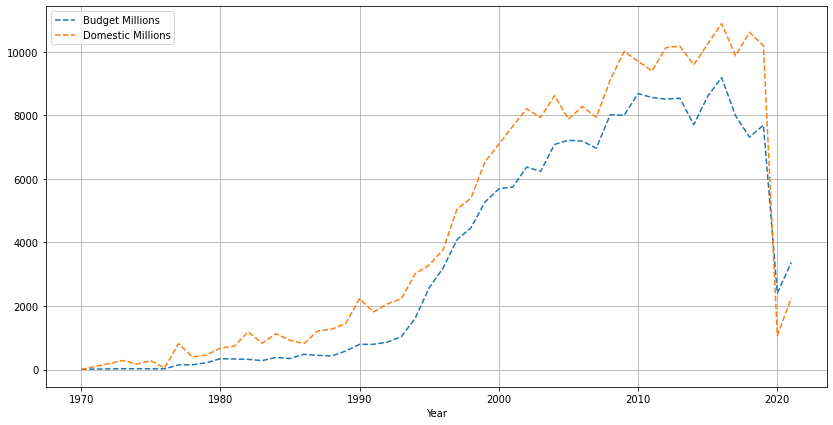

In [22]:
df.groupby('Year')[['Budget Millions','Domestic Millions']].sum() \
    .plot(linestyle='dashed', legend=True, grid=True, figsize=(14,7))


### Plot Count of releases by Month of the year

<AxesSubplot:xlabel='Month', ylabel='Number of Releases'>

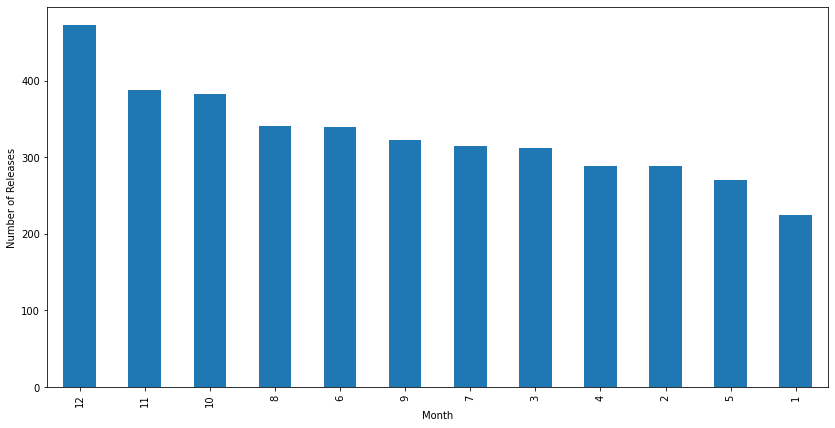

In [23]:
df['Month'].value_counts().plot(kind='bar', figsize=(14,7), xlabel='Month', ylabel='Number of Releases')

### Plot total releases by month (sorted)  
also uses colormap for variety

<AxesSubplot:>

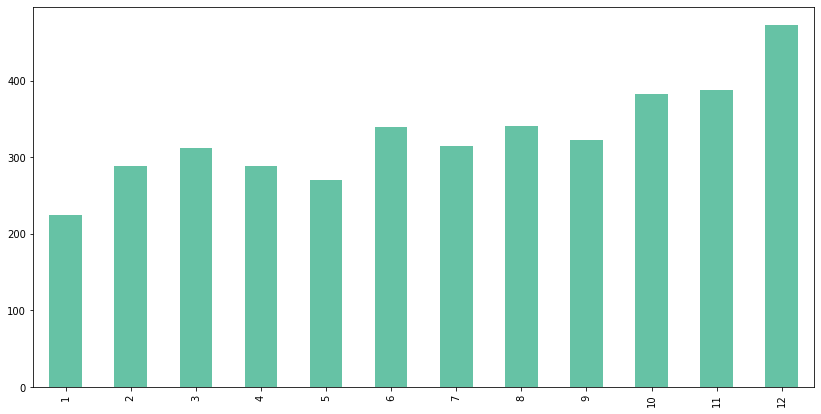

In [24]:
df['Month'].value_counts().sort_index(ascending=True).plot(kind='bar', figsize=(14,7), colormap='Set2')

### Plot total release by month using `.groupby` - Second Method  
also use colormap for variety

<AxesSubplot:xlabel='Month'>

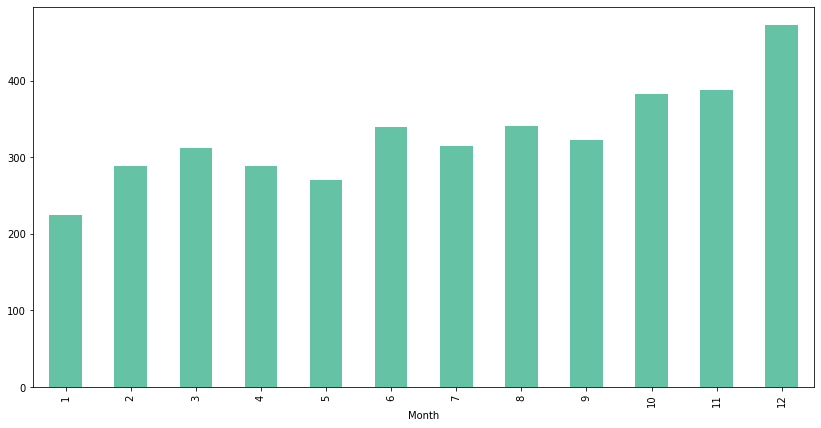

In [25]:
df.groupby('Month')['Release Date'].count().plot(kind='bar', figsize=(14,7), colormap='Set2')

### Plot which months have the highest Domestic Totals

<AxesSubplot:xlabel='Month'>

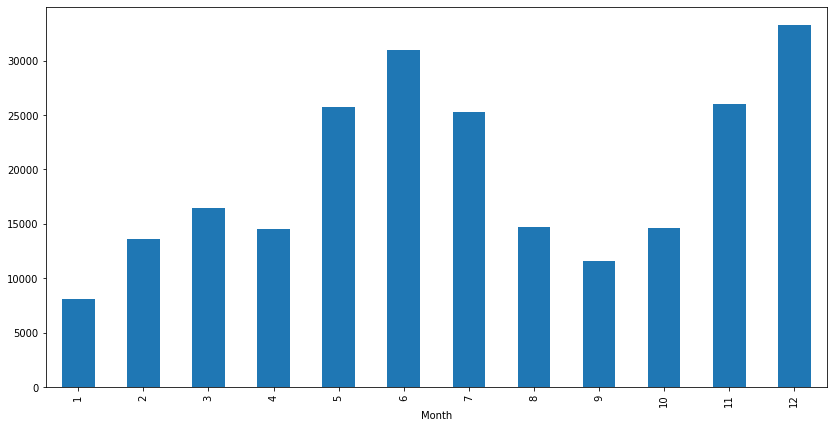

In [26]:
df.groupby('Month')['Domestic Millions'].sum().plot(kind='bar', figsize=(14,7))

### More `.groupby` syntax

In [27]:
year_group = df.groupby('Year')
year_group.get_group(1997).set_index('Year')


,Release Date,Movie Title,Production Budget,Domestic Gross,Worldwide Gross,Domestic Millions,Worldwide Millions,Budget Millions,Month
Year,,,,,,,,,
1997,1997-12-18,Titanic,200000000,659363944,2207986545,659.36,2207.99,200.0,12
1997,1997-06-20,Batman & Robin,125000000,107325195,238317814,107.33,238.32,125.0,6
1997,1997-02-07,Dante’s Peak,115000000,67163857,178200000,67.16,178.20,115.0,2
1997,1997-12-19,Tomorrow Never Dies,110000000,125304276,339504276,125.30,339.50,110.0,12
1997,1997-06-13,Speed 2: Cruise Control,110000000,48097081,150468000,48.10,150.47,110.0,6
...,...,...,...,...,...,...,...,...,...
1997,1997-10-31,Critical Care,12000000,220175,220175,0.22,0.22,12.0,10
1997,1997-06-07,Madadayo,11900000,48856,49451,0.05,0.05,11.9,6
1997,1997-12-05,Good Will Hunting,10000000,138433435,225925989,138.43,225.93,10.0,12


### Same as above

In [28]:
df.groupby('Year').get_group(1997)

,Release Date,Movie Title,Production Budget,Domestic Gross,Worldwide Gross,Domestic Millions,Worldwide Millions,Budget Millions,Year,Month
45,1997-12-18,Titanic,200000000,659363944,2207986545,659.36,2207.99,200.0,1997,12
303,1997-06-20,Batman & Robin,125000000,107325195,238317814,107.33,238.32,125.0,1997,6
337,1997-02-07,Dante’s Peak,115000000,67163857,178200000,67.16,178.20,115.0,1997,2
353,1997-12-19,Tomorrow Never Dies,110000000,125304276,339504276,125.30,339.50,110.0,1997,12
368,1997-06-13,Speed 2: Cruise Control,110000000,48097081,150468000,48.10,150.47,110.0,1997,6
...,...,...,...,...,...,...,...,...,...,...
3648,1997-10-31,Critical Care,12000000,220175,220175,0.22,0.22,12.0,1997,10
3669,1997-06-07,Madadayo,11900000,48856,49451,0.05,0.05,11.9,1997,6
3753,1997-12-05,Good Will Hunting,10000000,138433435,225925989,138.43,225.93,10.0,1997,12
3849,1997-03-14,Love Jones,10000000,12554569,12554569,12.55,12.55,10.0,1997,3


### Plot biggest movies in specific year  
Use `.set_index` to index agaist the X axis

<AxesSubplot:xlabel='Movie Title', ylabel='USD'>

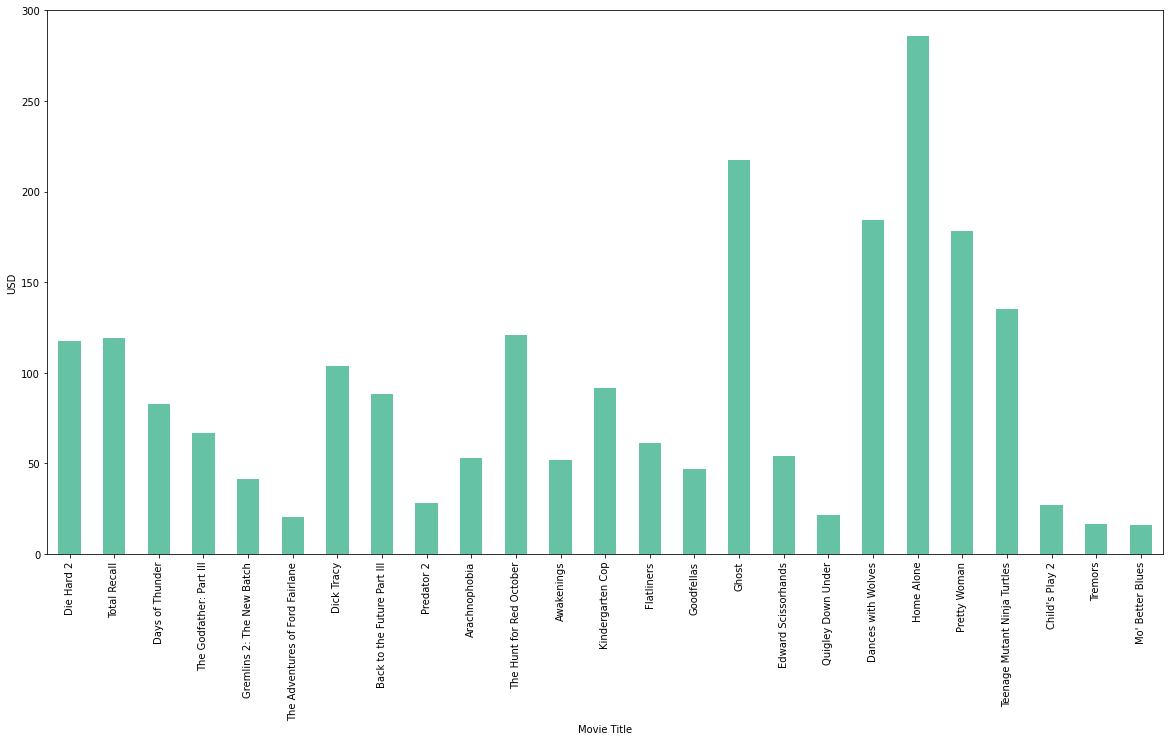

In [29]:
year_group.get_group(1990).set_index('Movie Title')['Domestic Millions'] \
    .plot(kind='bar', figsize=(20,10), colormap='Set2', ylabel='USD')

### Plot highest grossing Star Trek Films

<AxesSubplot:xlabel='Movie Title'>

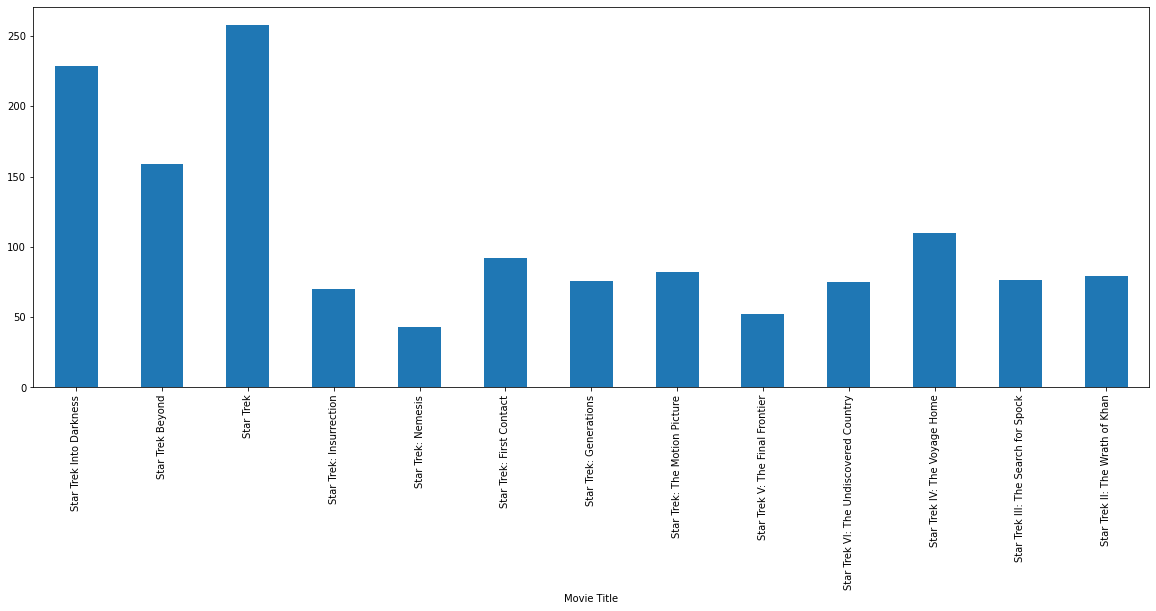

In [30]:
fltr = df['Movie Title'].str.contains('Star Trek')
df.loc[fltr].set_index('Movie Title')['Domestic Millions'].plot(kind='bar', figsize=(20,7))

### Create a column for Day of Week of Release

In [31]:
df['Day of Release'] = df['Release Date'].dt.day_name()
df.head()

,Release Date,Movie Title,Production Budget,Domestic Gross,Worldwide Gross,Domestic Millions,Worldwide Millions,Budget Millions,Year,Month,Day of Release
0,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564,858.37,2797.80,400.0,2019,4,Tuesday
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,241.07,1045.71,379.0,2011,5,Friday
2,2015-04-22,Avengers: Age of Ultron,365000000,459005868,1395316979,459.01,1395.32,365.0,2015,4,Wednesday
3,2015-12-16,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2064615817,936.66,2064.62,306.0,2015,12,Wednesday
4,2018-04-25,Avengers: Infinity War,300000000,678815482,2044540523,678.82,2044.54,300.0,2018,4,Wednesday


### Plot movie domestic totals by release day of week

<AxesSubplot:xlabel='Day of Release', ylabel='Millions USD'>

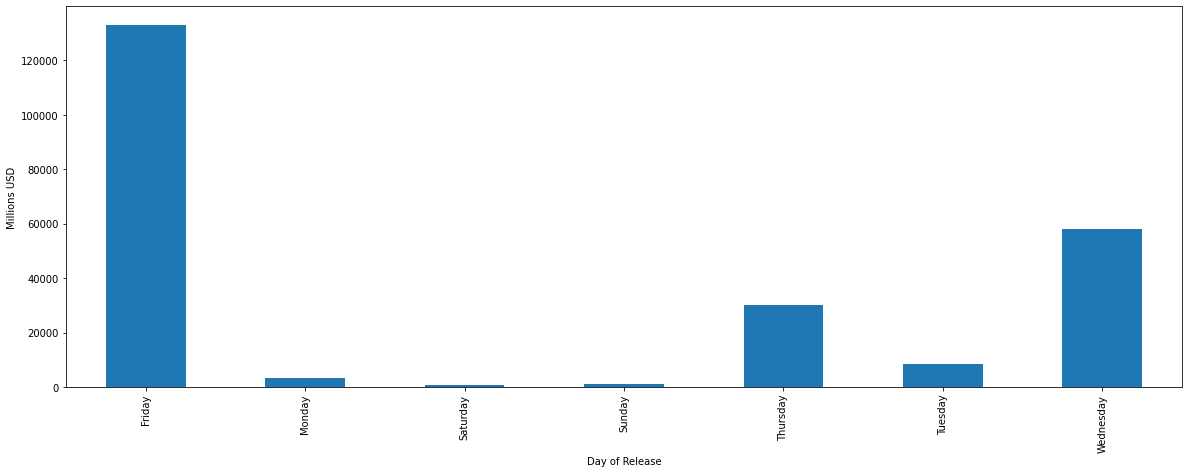

In [32]:
df.groupby('Day of Release')['Domestic Millions'].sum().plot(kind='bar', figsize=(20,7), ylabel='Millions USD')